In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import nilearn
import nibabel as nib
from nilearn import image
import pandas as pd
from nilearn import datasets

/home/dell/anaconda3/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
DATA_PATH = ("/home/dell/IDA_data/PD/connectome_DTI")
datatype_list=['timeseries','matrix']
group_names = ['control','PD','Prodromal','SWEDD']

In [3]:
def plot_matrix(matrix,figname, degree):
    plt.figure(figsize=(10, 10),num=figname)
    plt.title(figname)
    # Mask out the major diagonal
    np.fill_diagonal(matrix, 0)
    plt.imshow(matrix, interpolation="nearest", cmap="RdBu_r",
           vmax=degree, vmin=-degree)
    plt.colorbar()

In [4]:
def load_matrix(group,subname,norm=False):
    mat_dir=os.path.join(DATA_PATH,group,subname,'connectome_a2009s_2000k.csv')
    mat = np.loadtxt(open(mat_dir,"rb"),delimiter=",",skiprows=0)
    if norm==True:
        mat = mat/mat.max(axis=0)
    return mat

In [8]:
def read_files(group_name):
    files_dir=os.path.join(DATA_PATH,group_name)
    filenames=os.listdir(files_dir)
    return filenames
files=read_files(group_names[3])
print(len(files),'subjects')
print(files)

11 subjects
['3581', '3871', '3573', '3582', '3384', '3820', '3550', '3101', '3326', '3566', '3836']


control
PD


<ipython-input-3-ea01dc4169e6>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 10),num=figname)


Prodromal
SWEDD


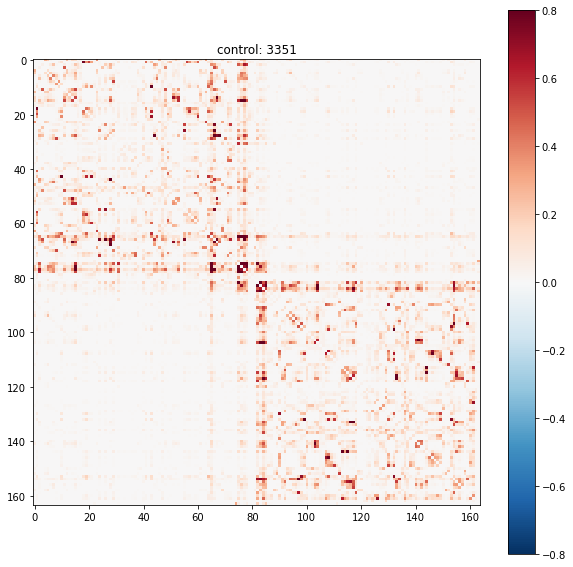

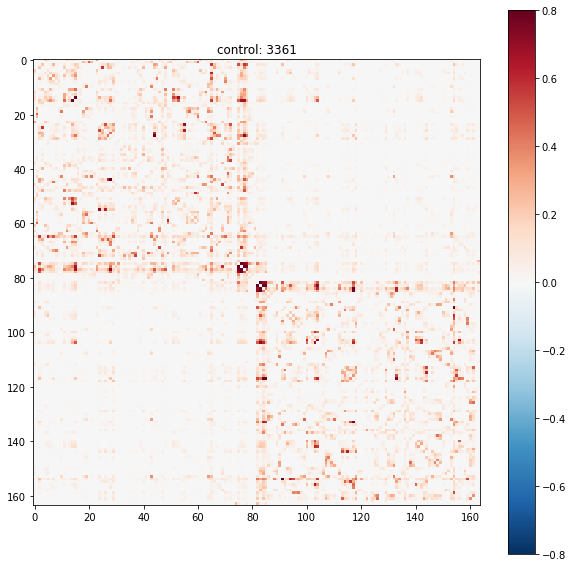

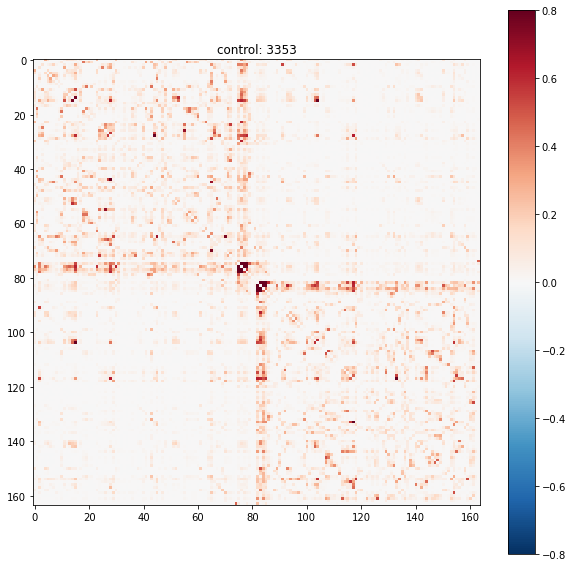

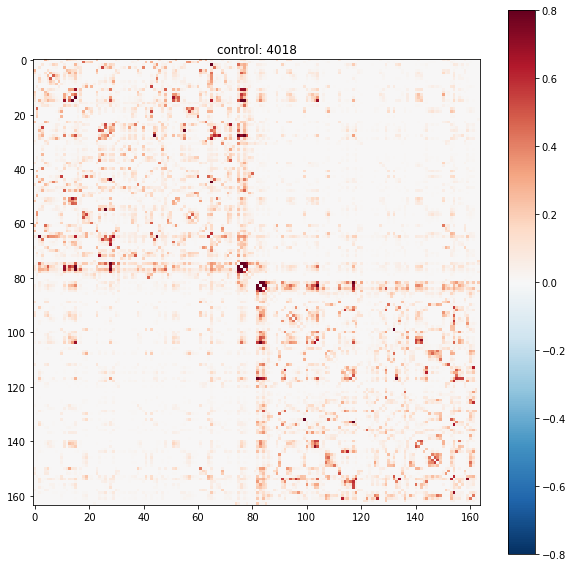

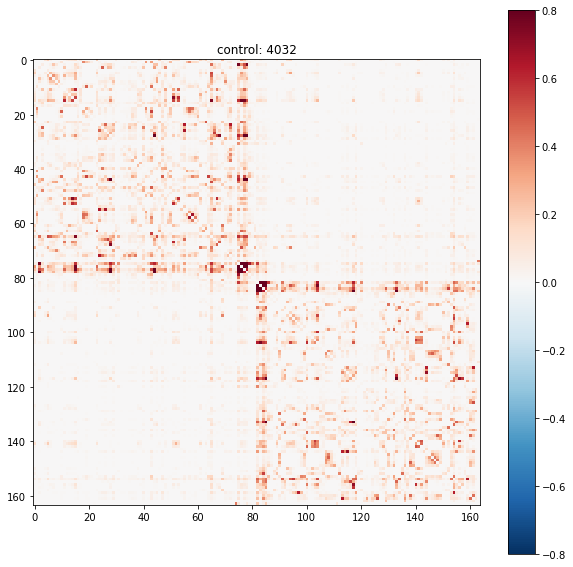

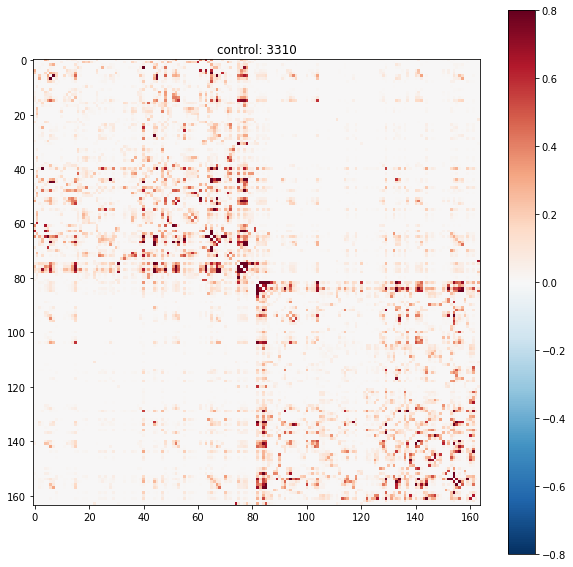

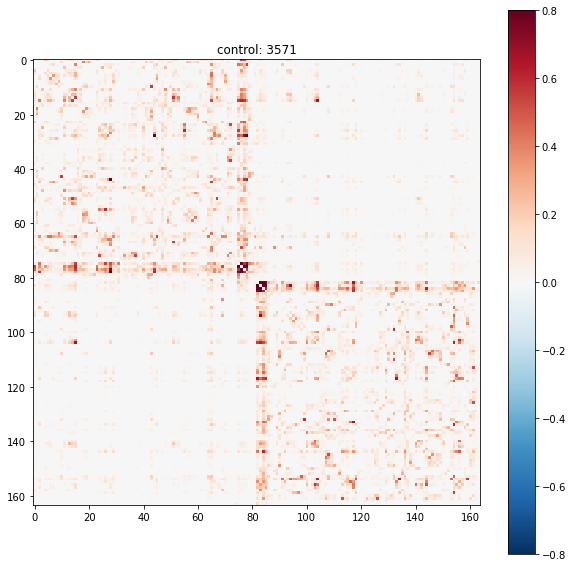

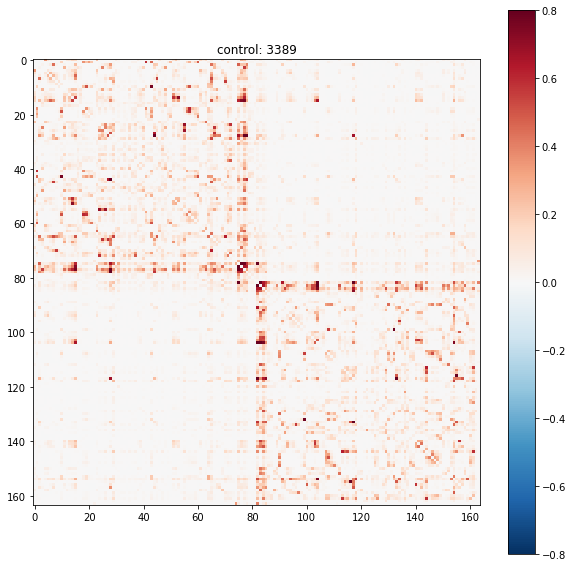

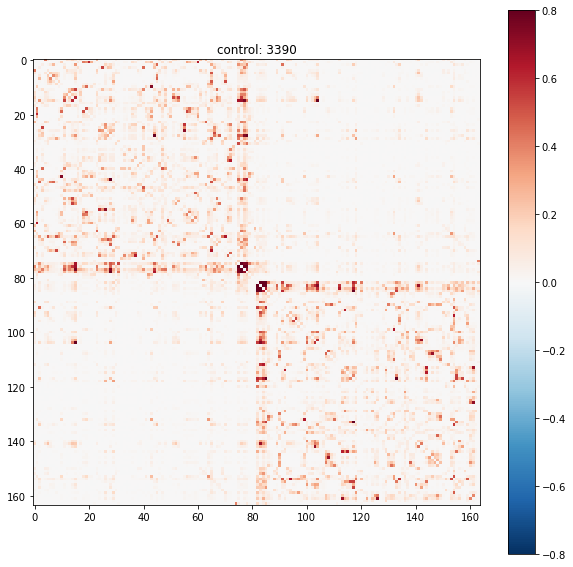

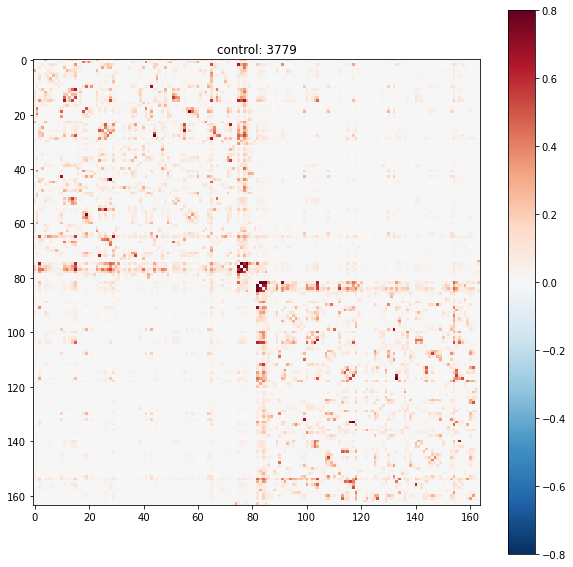

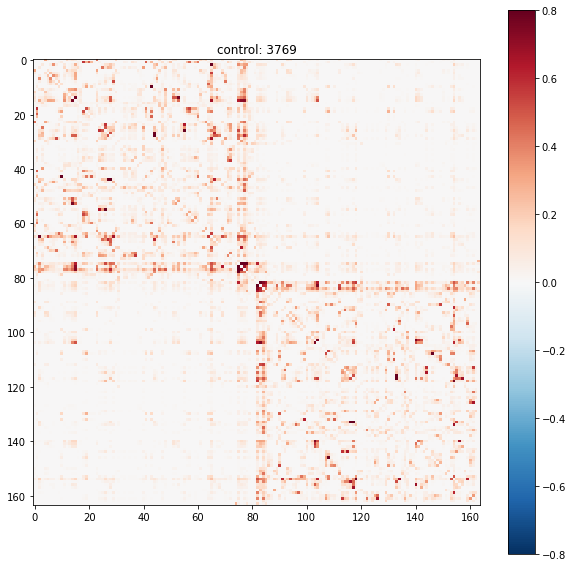

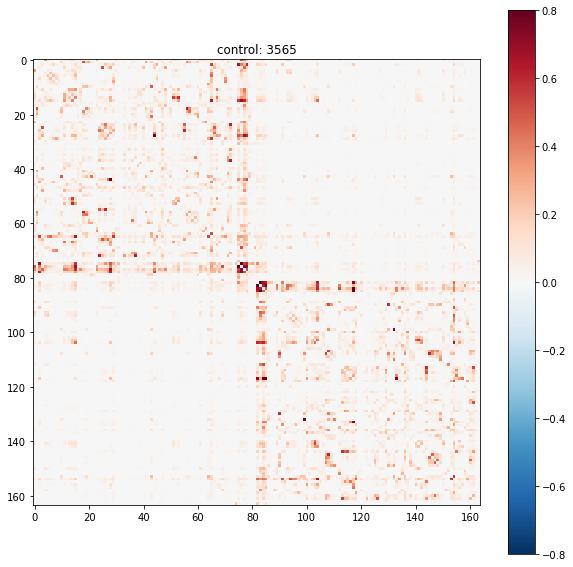

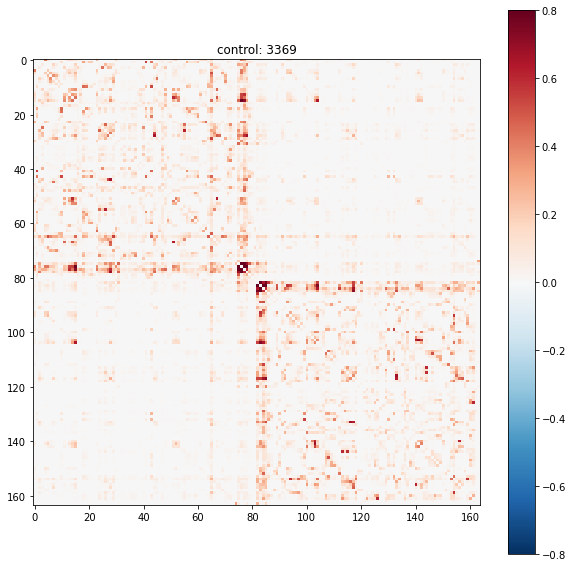

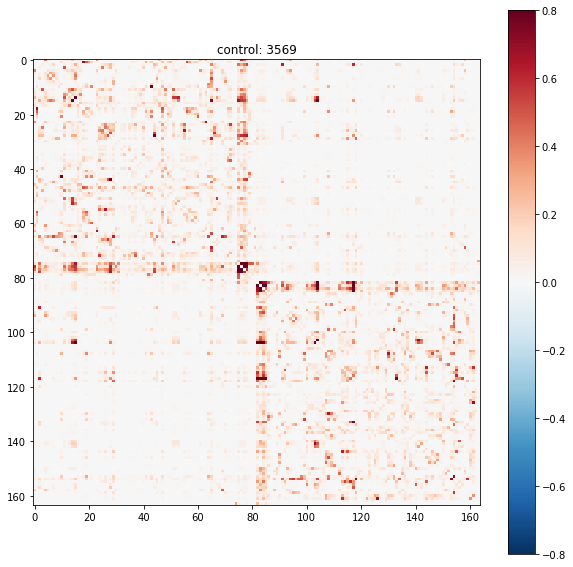

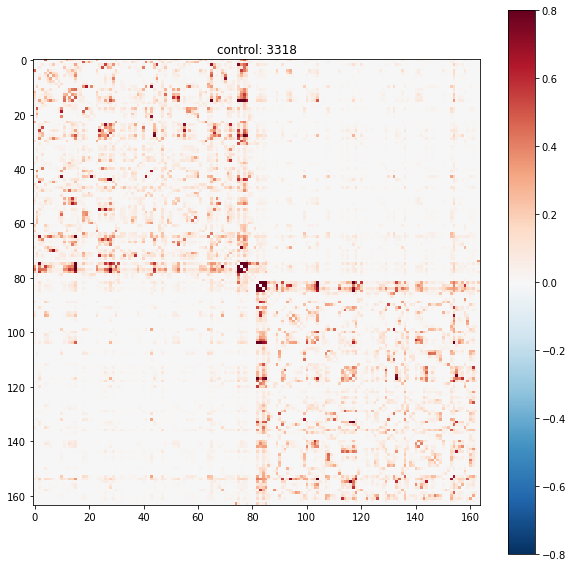

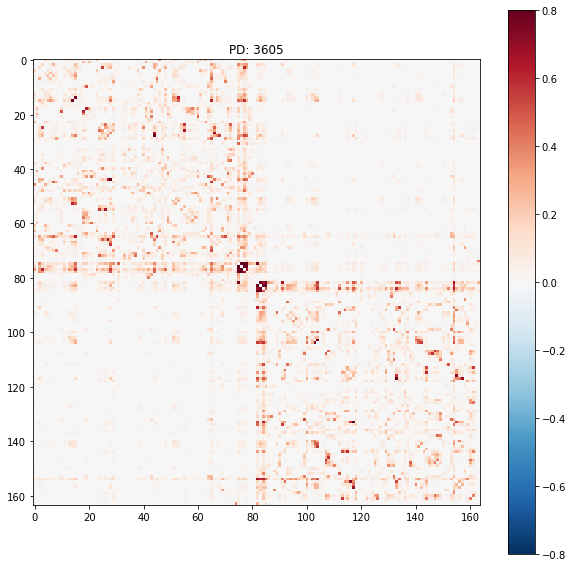

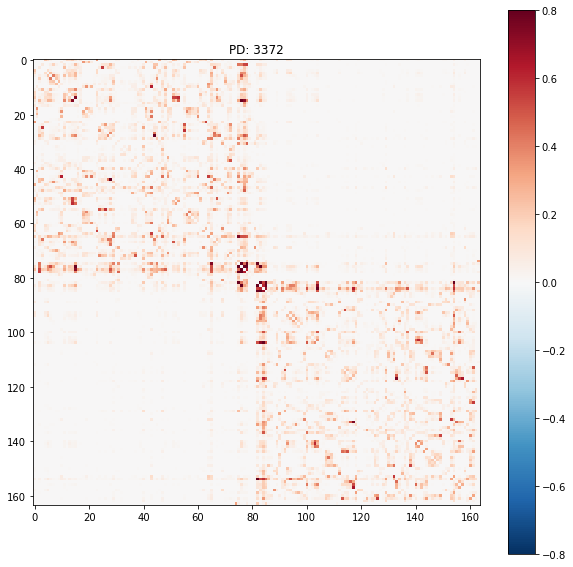

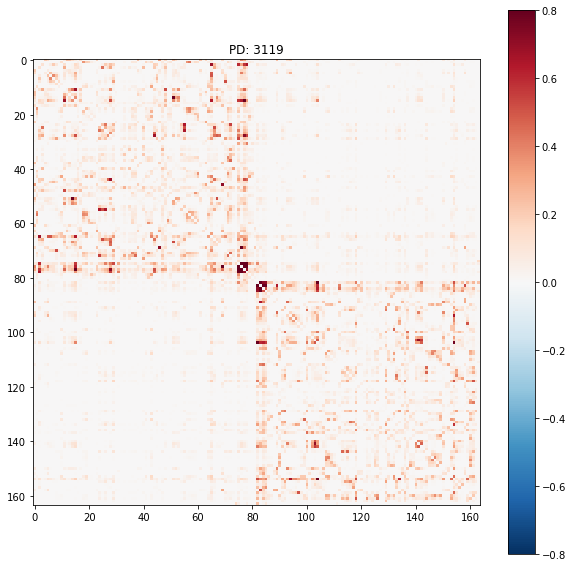

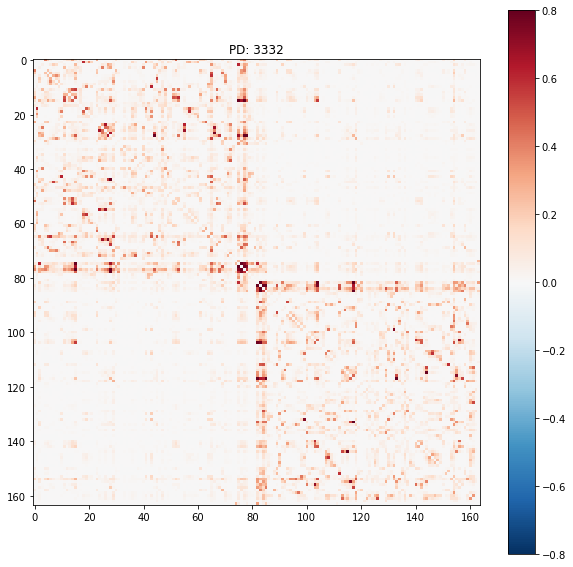

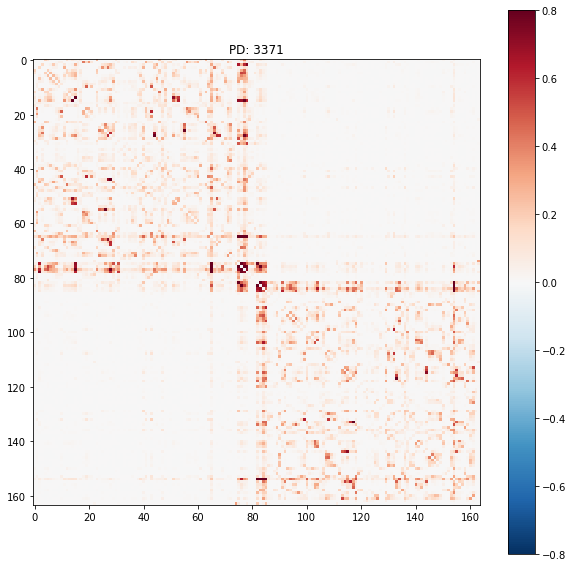

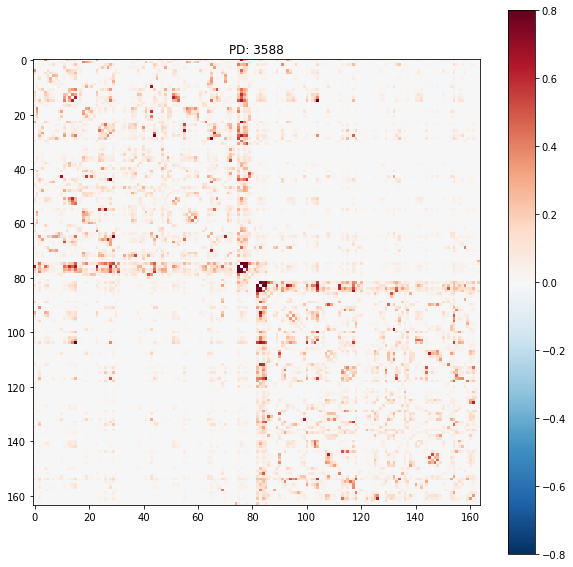

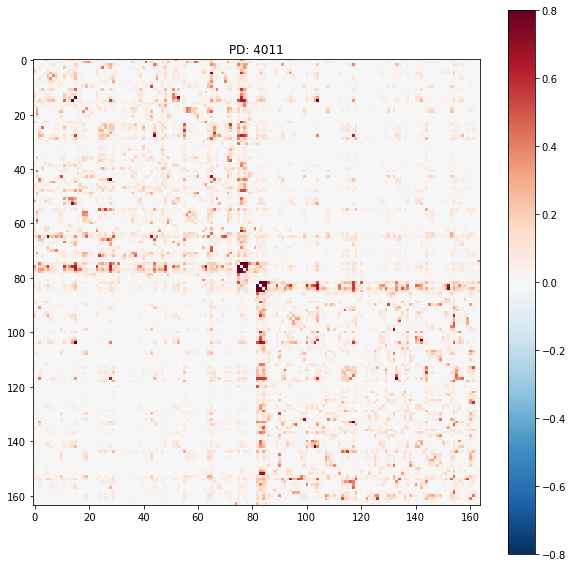

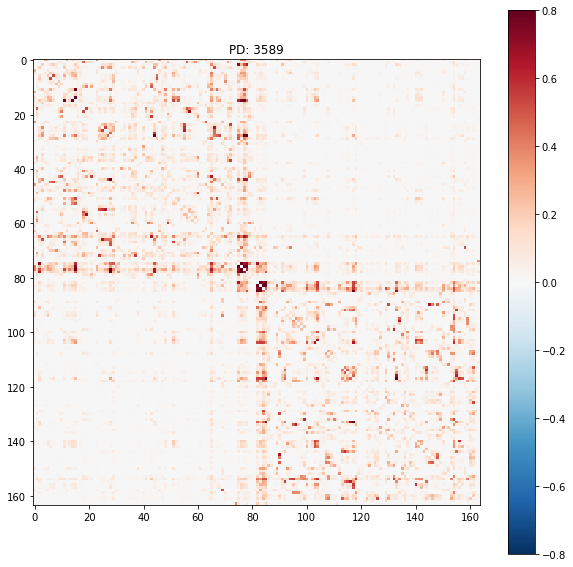

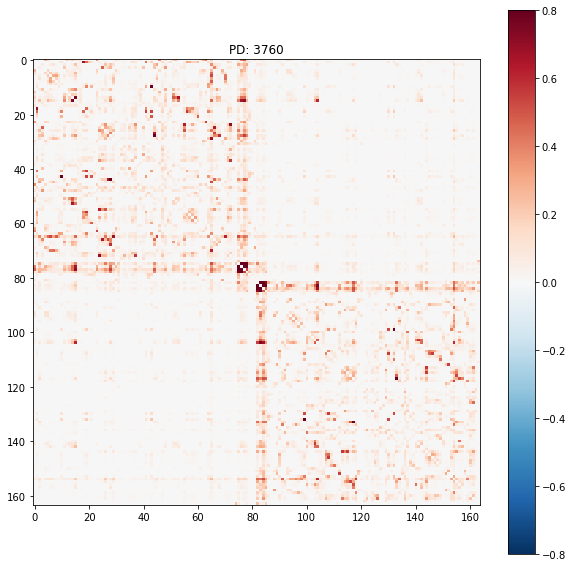

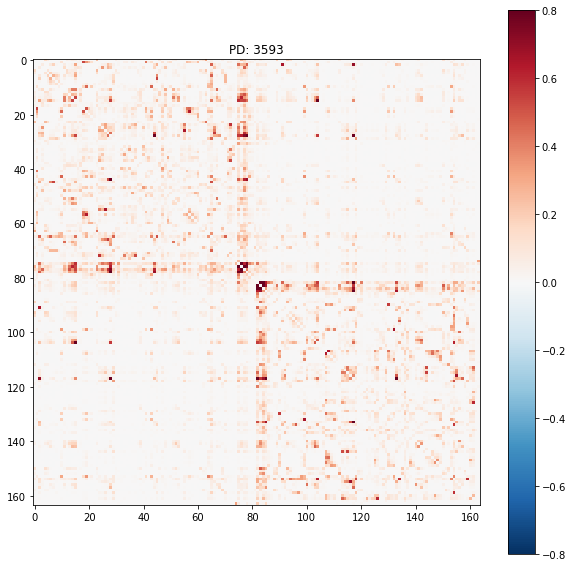

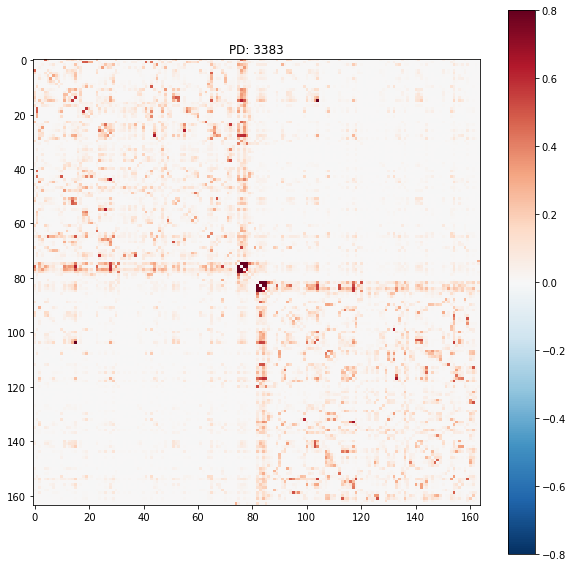

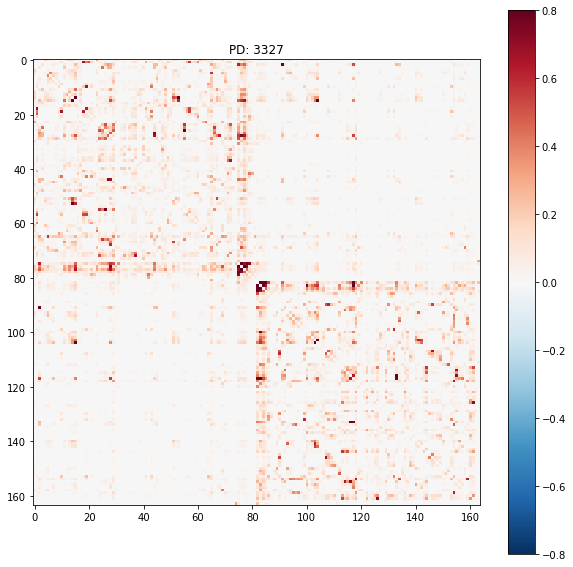

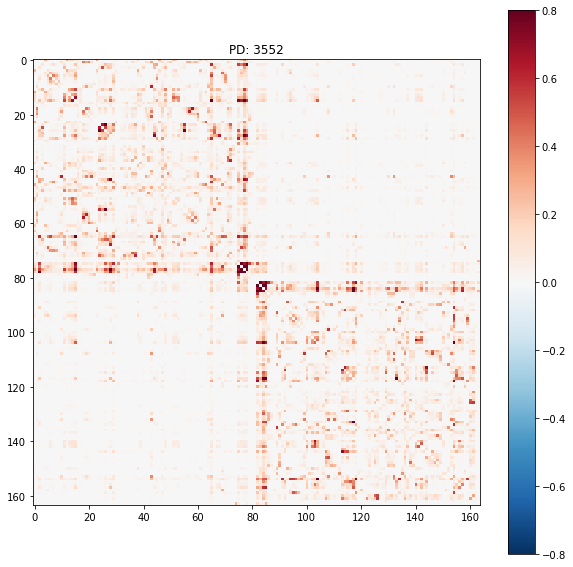

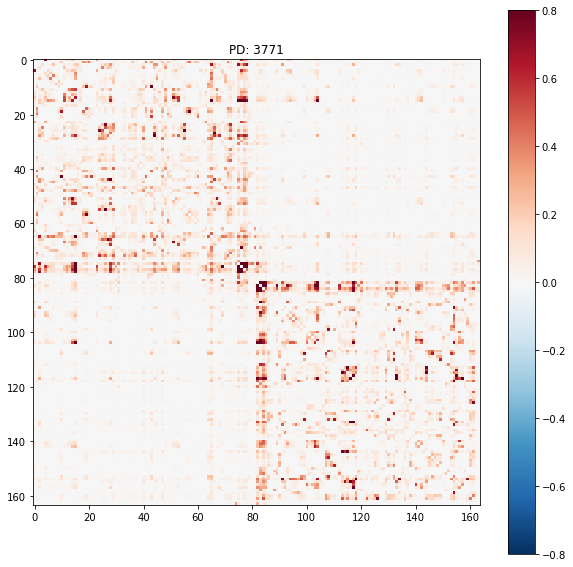

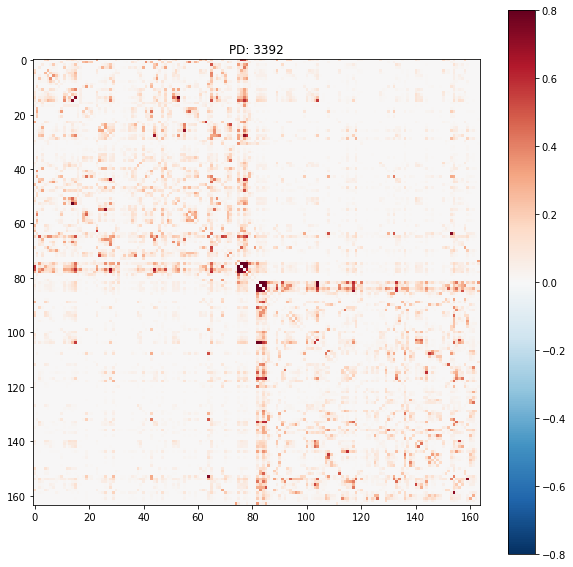

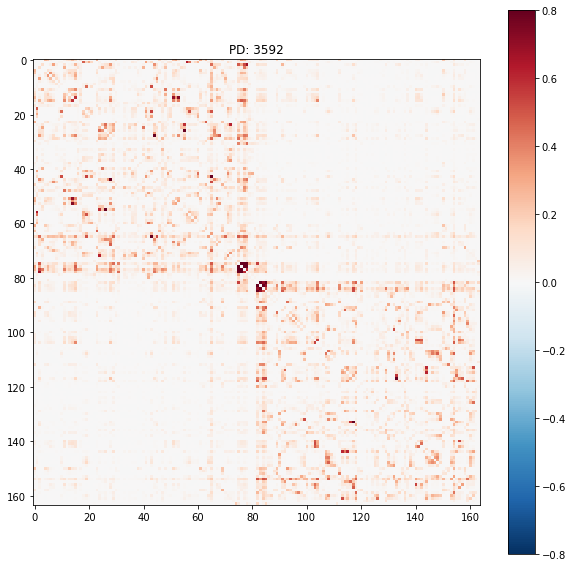

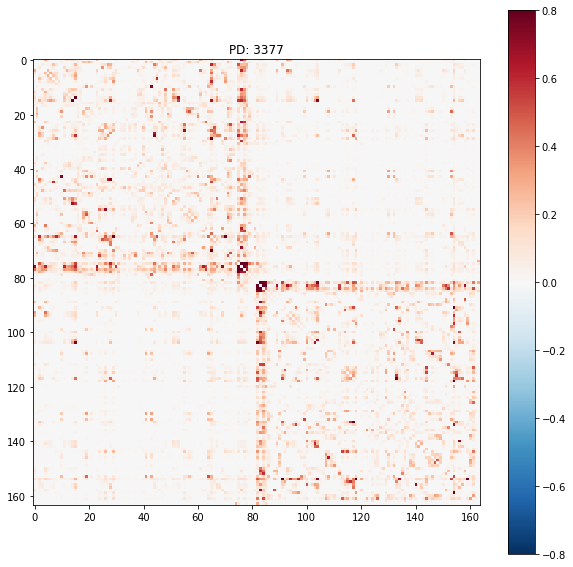

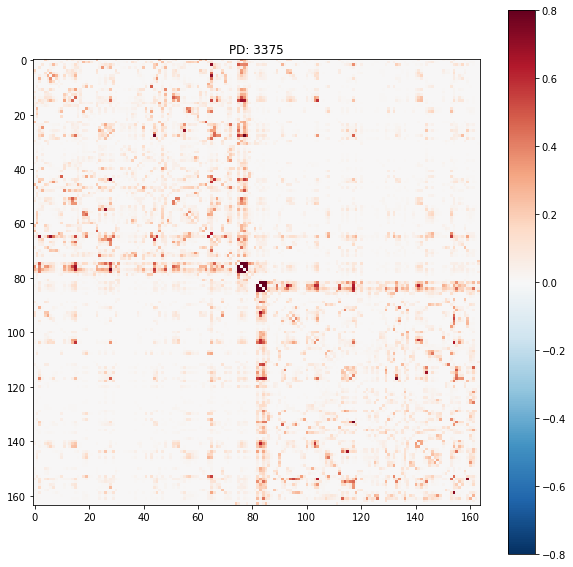

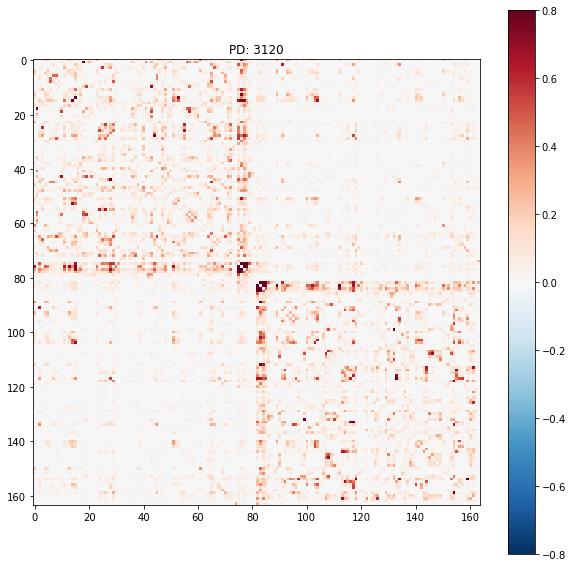

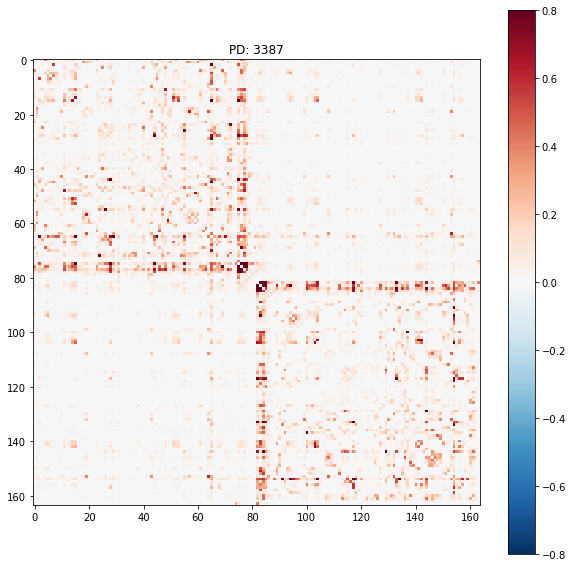

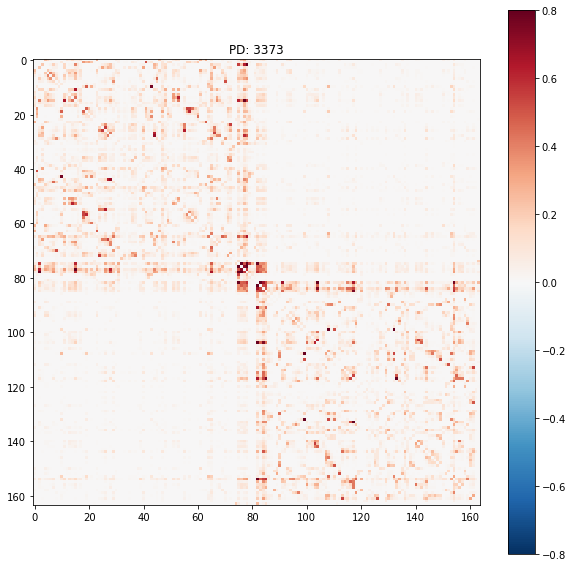

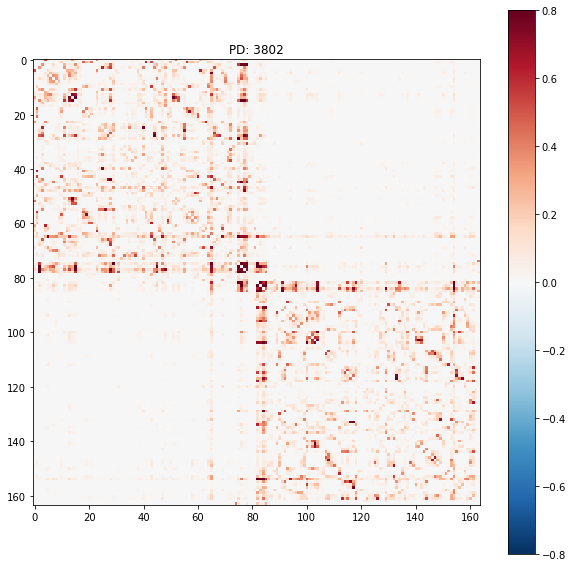

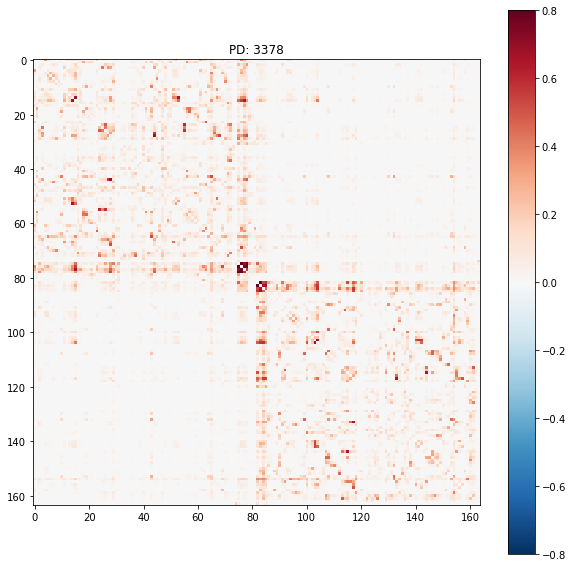

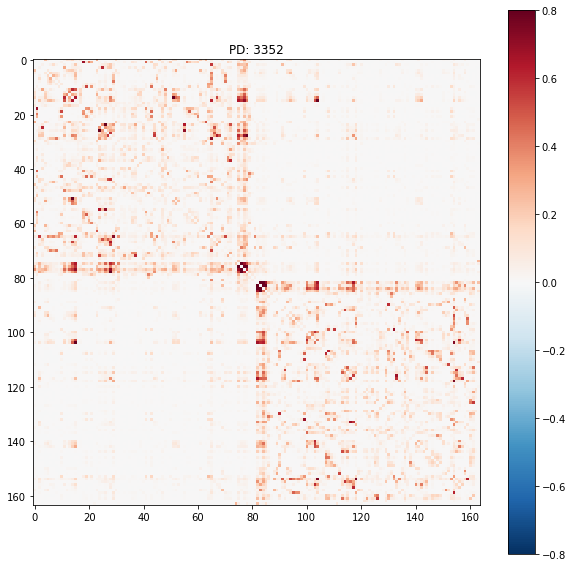

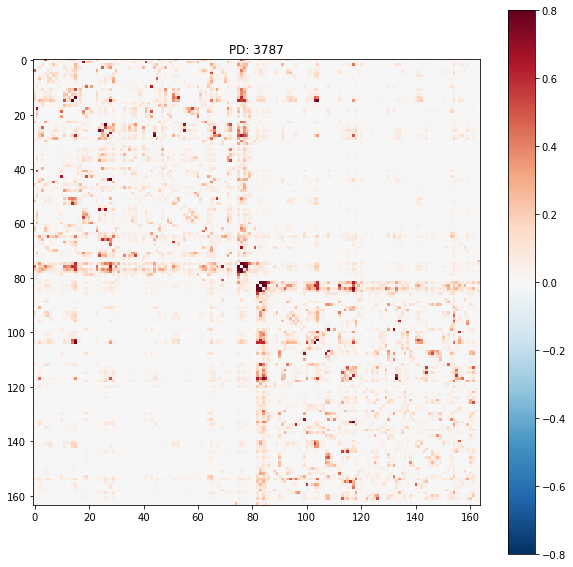

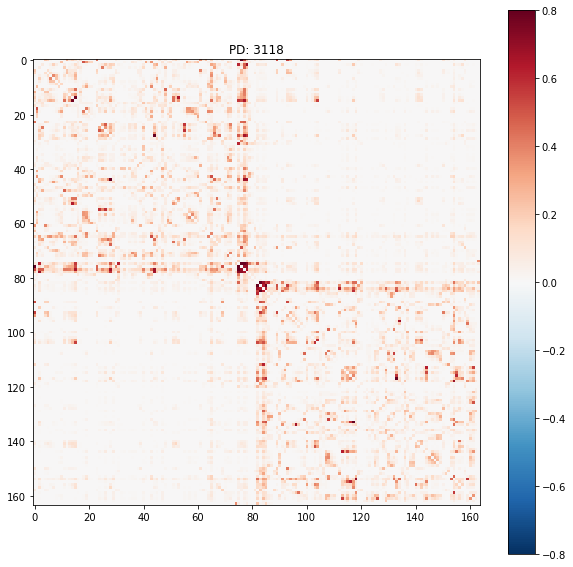

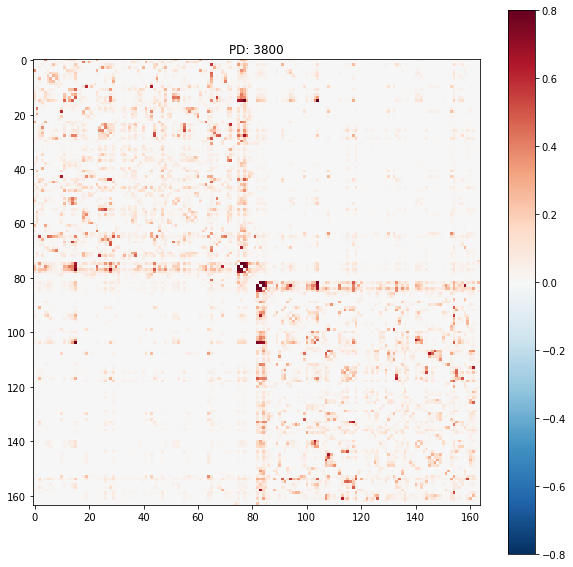

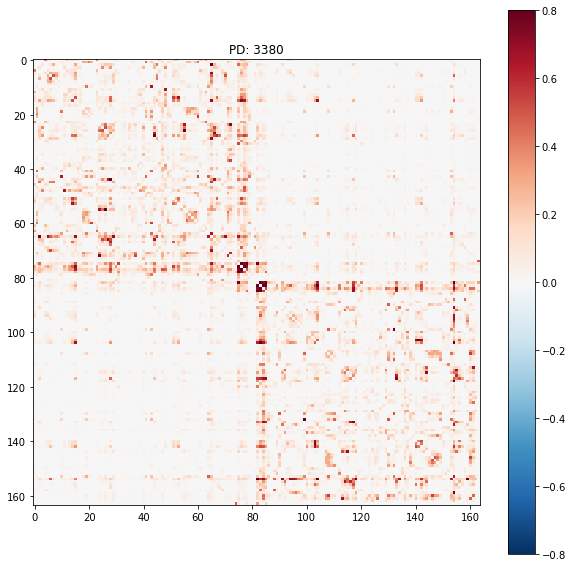

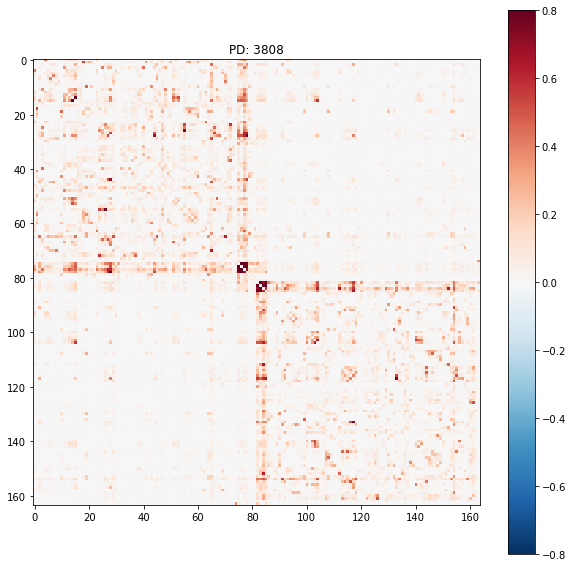

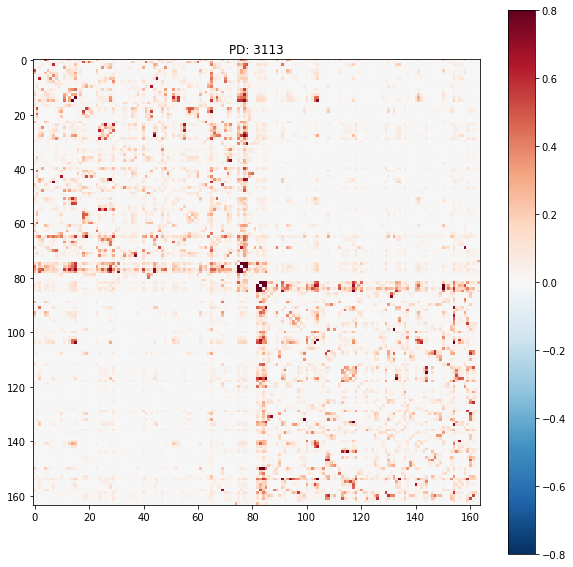

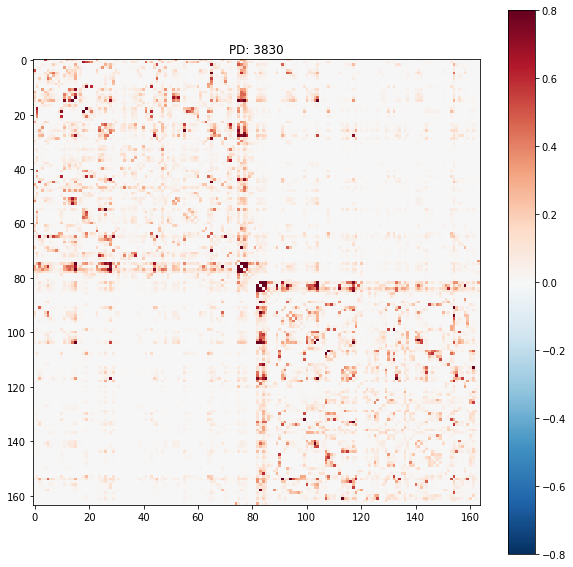

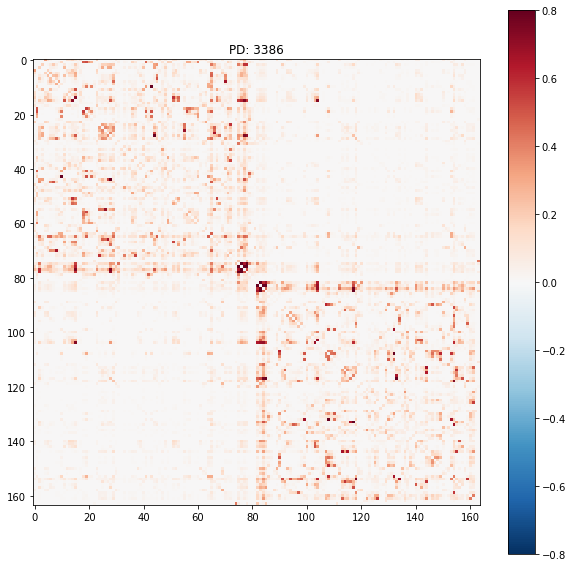

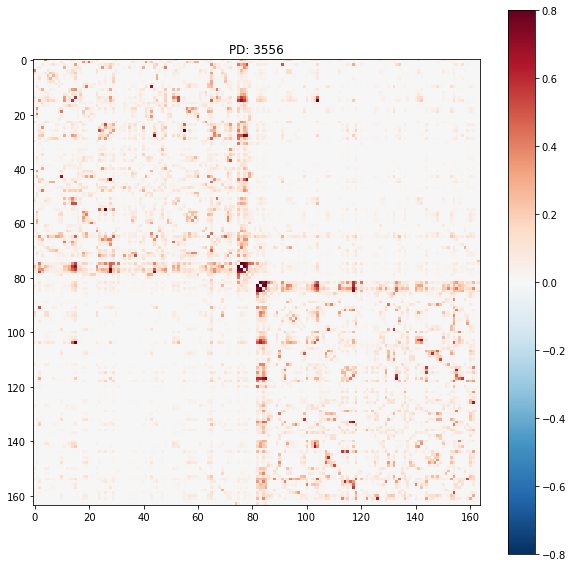

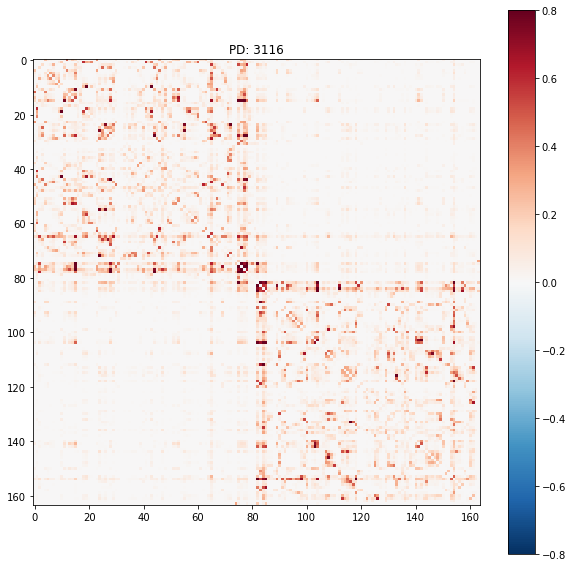

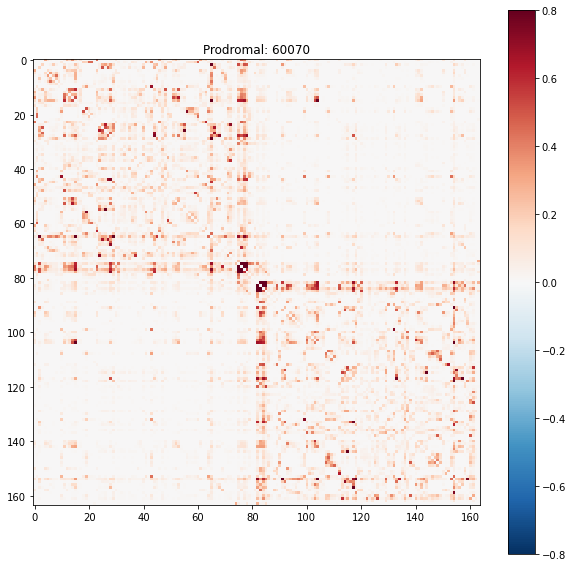

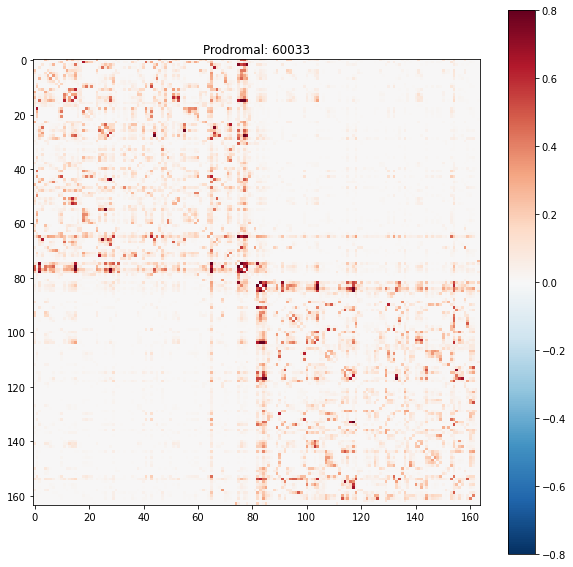

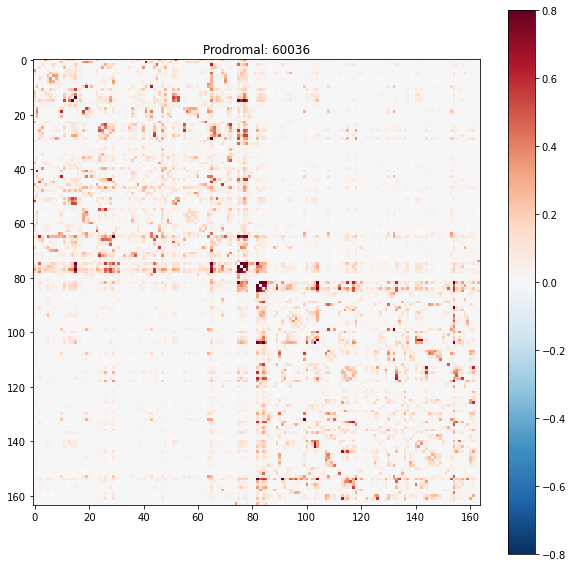

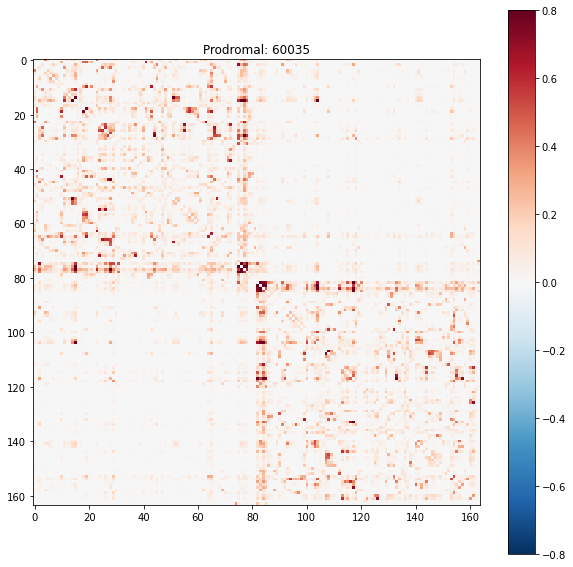

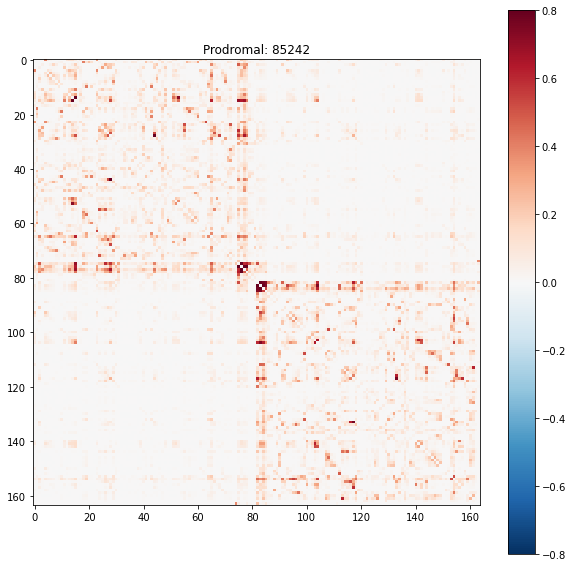

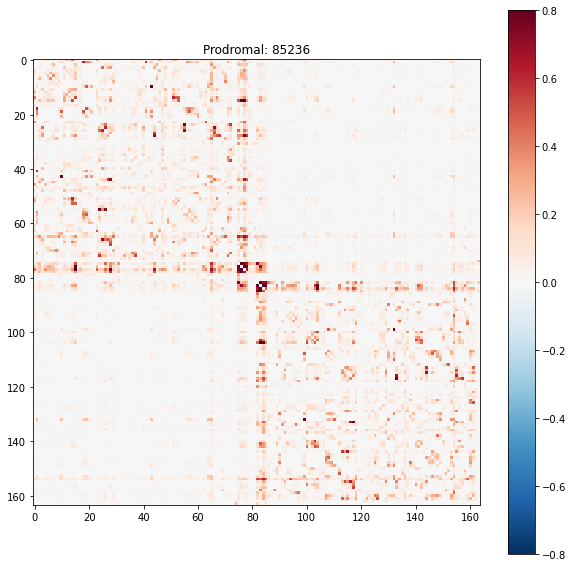

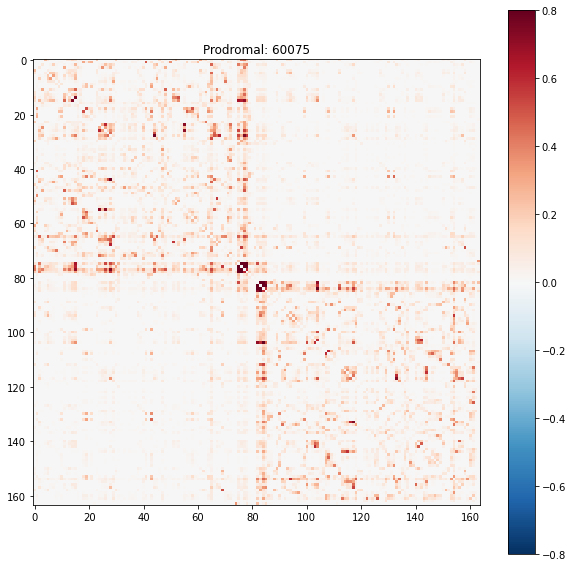

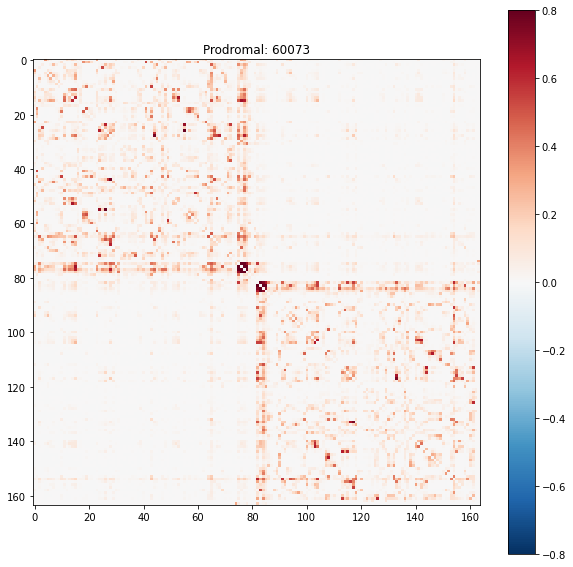

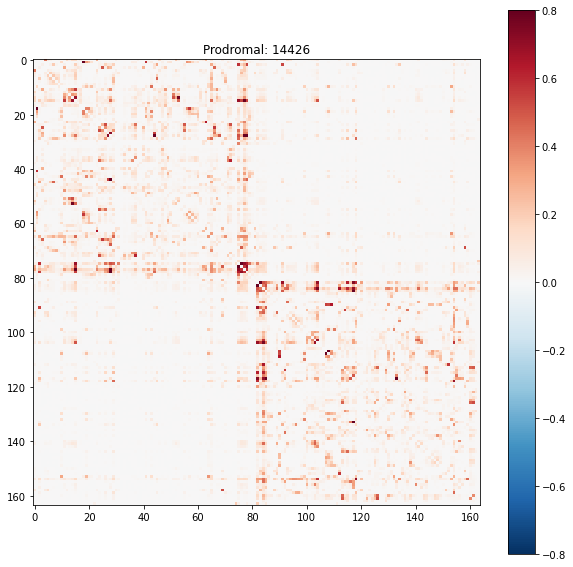

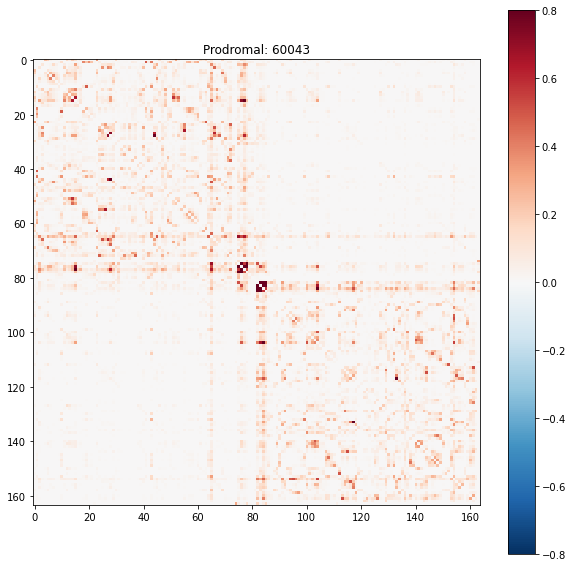

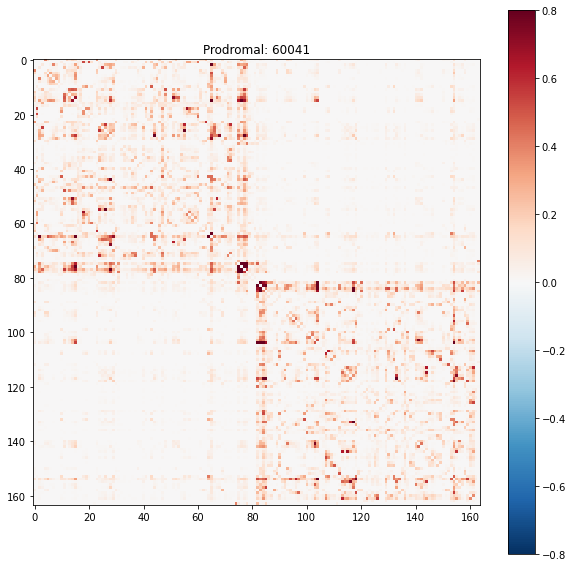

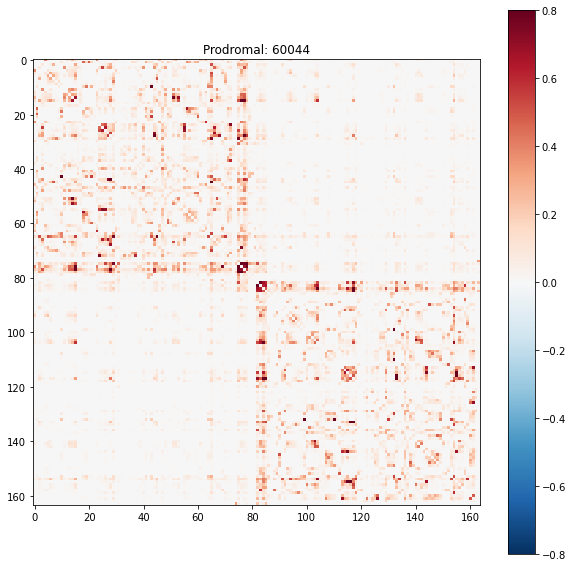

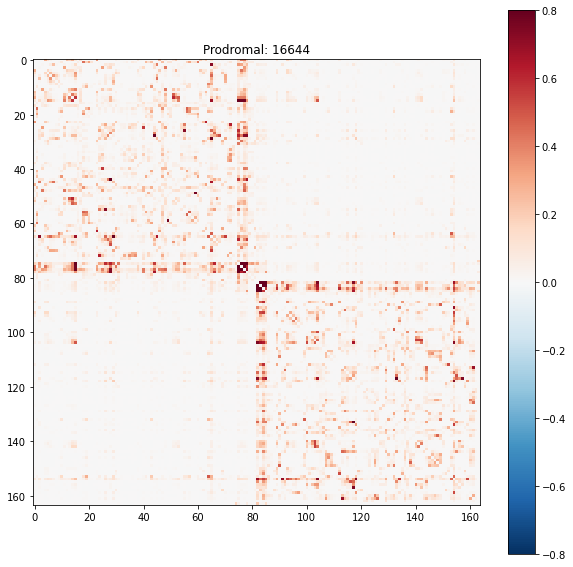

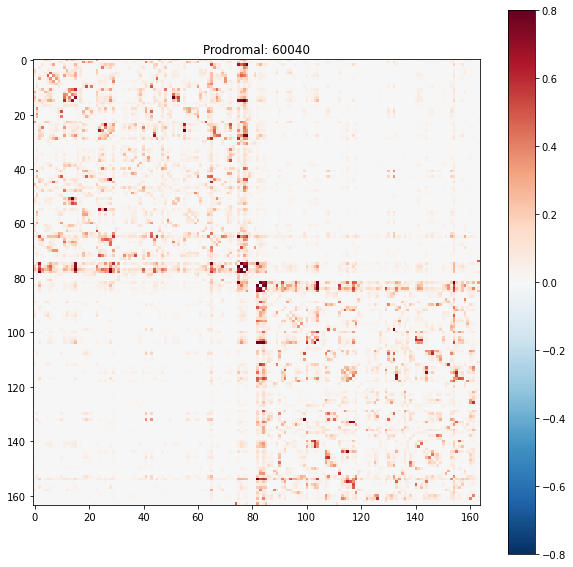

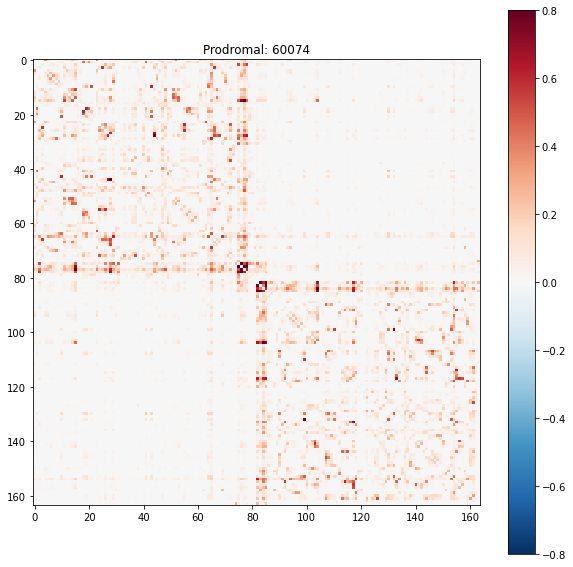

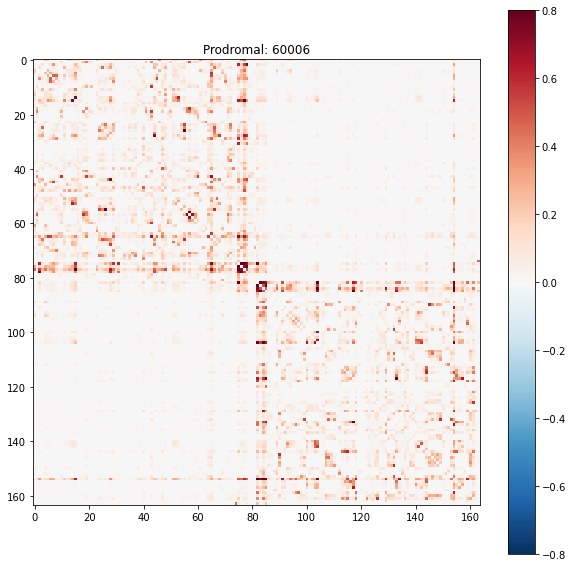

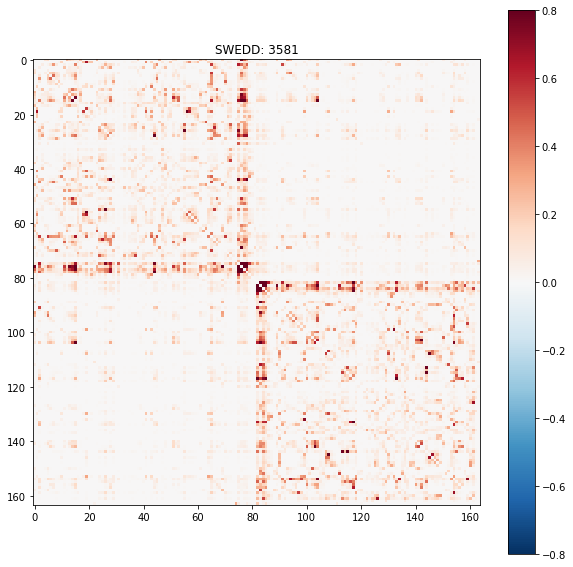

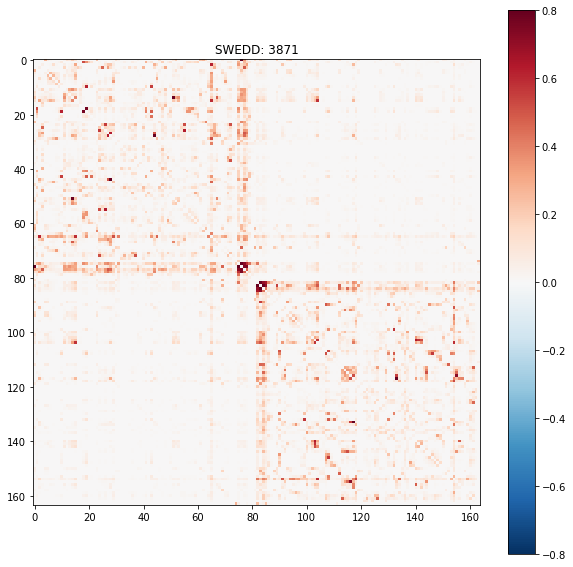

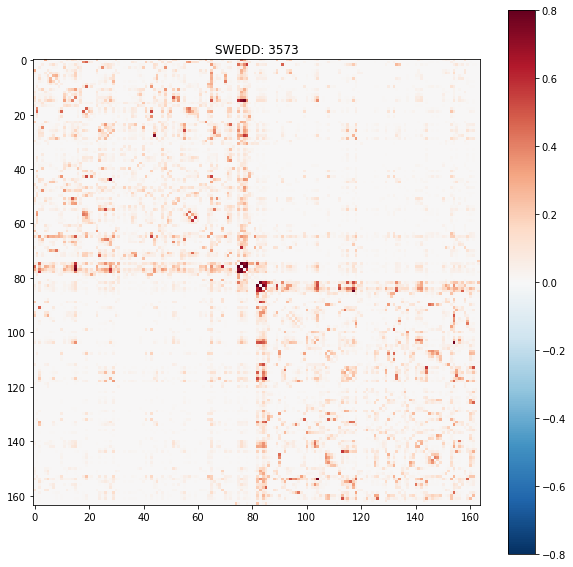

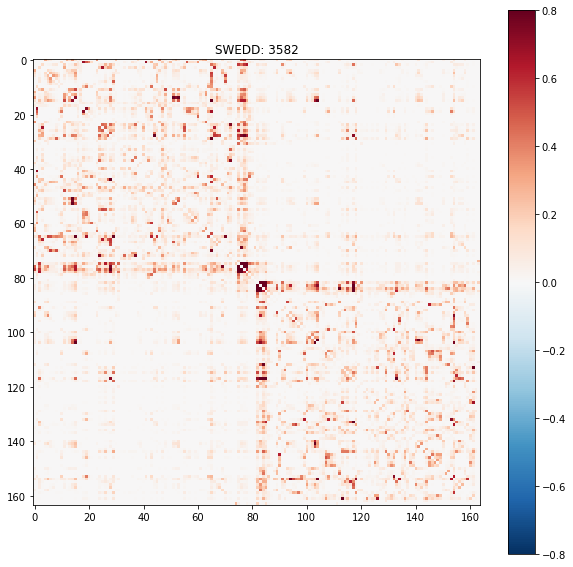

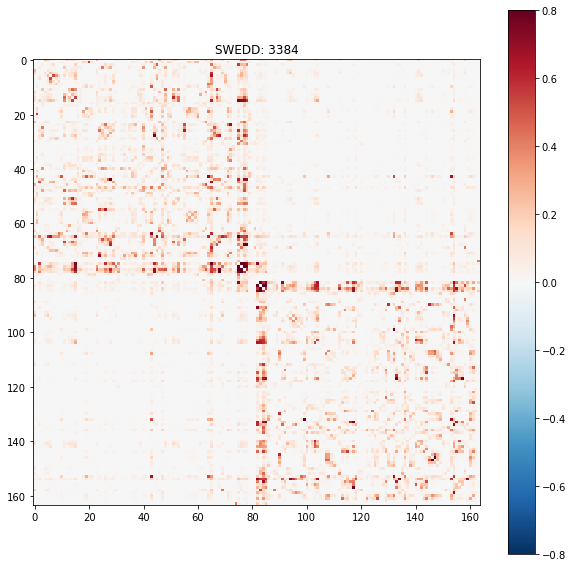

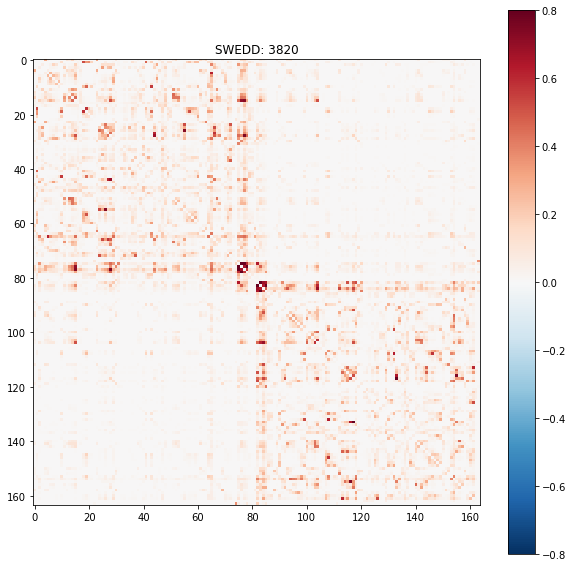

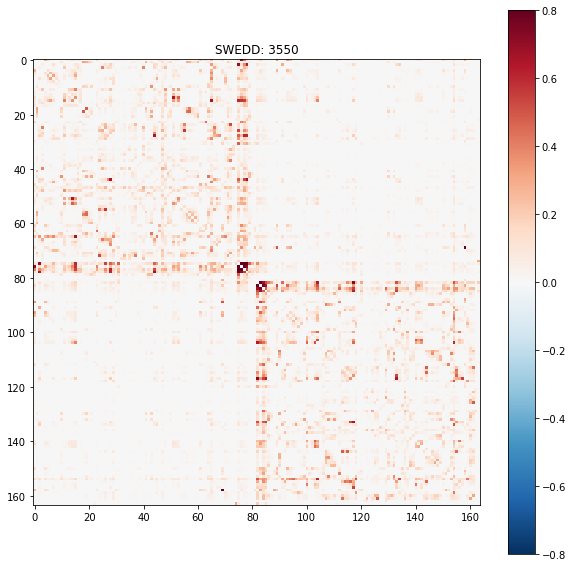

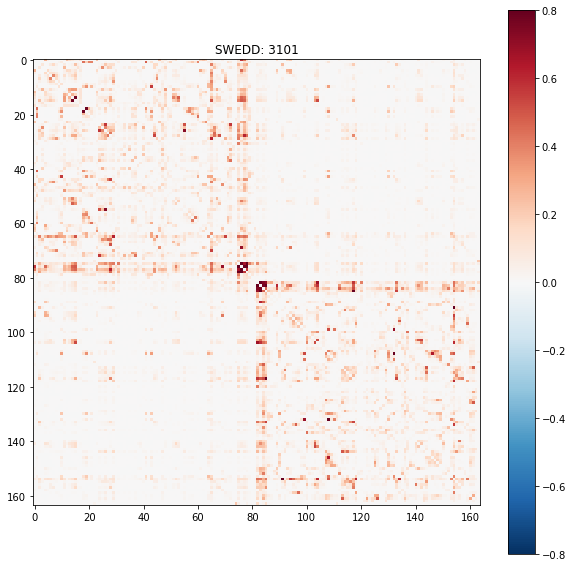

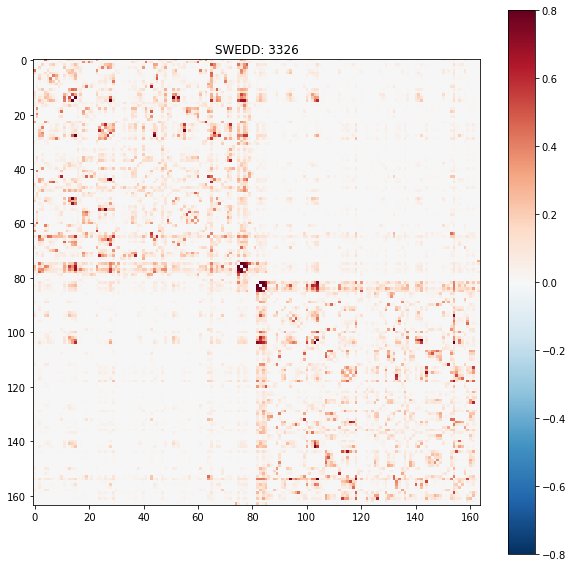

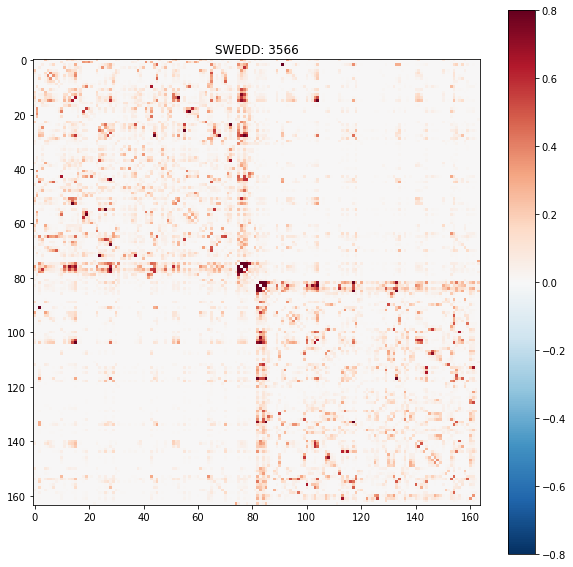

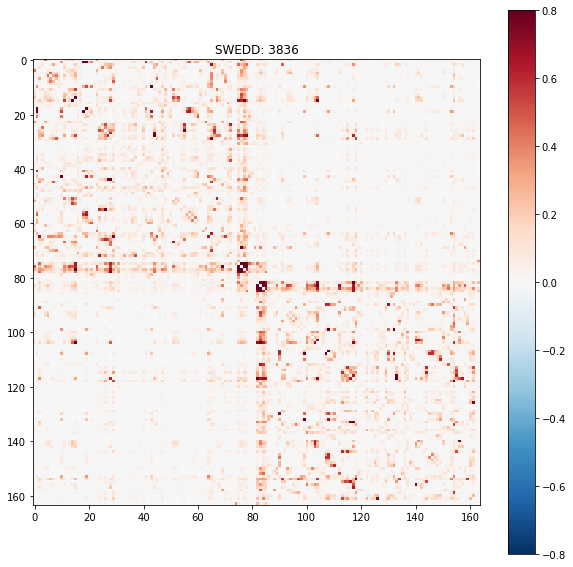

In [7]:
for g in group_names:    
    print(g)
    subs=read_files(g)
    #print(subs,"matrices:")
    for sub in subs:
        sc=load_matrix(g,sub,False)
        figtitle=g+': '+sub
        plot_matrix(sc,figtitle,0.8)      

In [8]:
def remove_cere(matrix, num):
    dim=matrix.shape
    print('origin dim: ', dim)
    matrix=np.delete(matrix,num-1,axis=0)
    matrix=np.delete(matrix,num-1,axis=1)
    return matrix

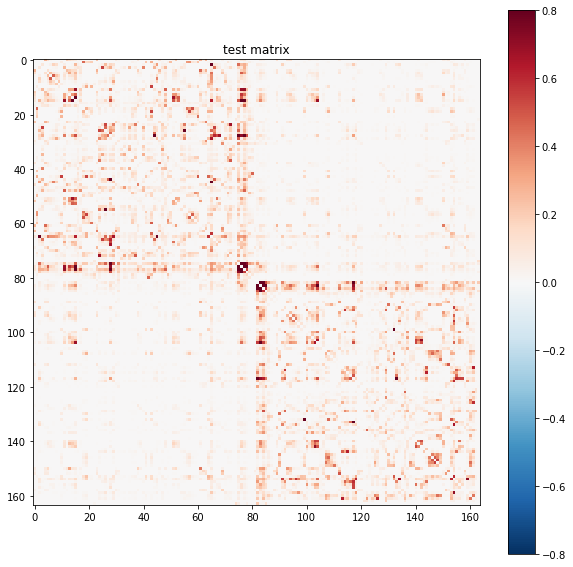

In [10]:
test_mat=load_matrix('control','4018',False)
plot_matrix(test_mat,'test matrix',0.8)

In [10]:
def matrix_1642148(matrix):
    mat_len=len(matrix[0])
    if mat_len==164:
        matrix=remove_cere(matrix,164)
        for i in range(15):
            no=89-i
            matrix=remove_cere(matrix,no)
    else:
        print('wrong matrix:')
        print(matrix.shape)
    return matrix

(164, 164)

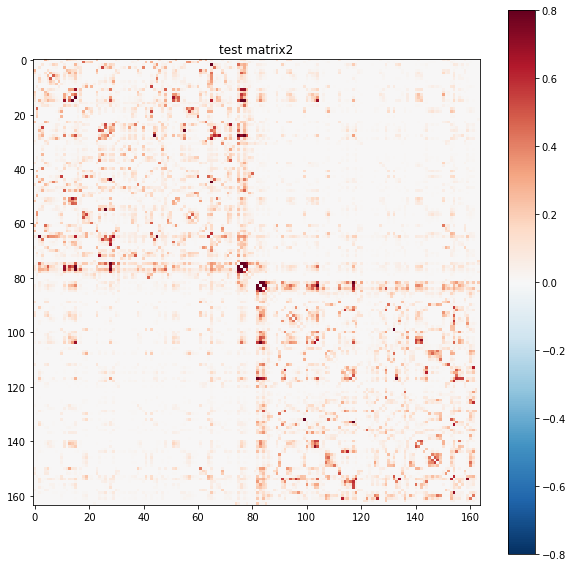

In [11]:
test_mat2=load_matrix('control','4018',False)
plot_matrix(test_mat2,'test matrix2',0.8)
test_mat2.shape

In [12]:
matte=matrix_1642148(test_mat2)
matte.shape

origin dim:  (164, 164)
origin dim:  (163, 163)
origin dim:  (162, 162)
origin dim:  (161, 161)
origin dim:  (160, 160)
origin dim:  (159, 159)
origin dim:  (158, 158)
origin dim:  (157, 157)
origin dim:  (156, 156)
origin dim:  (155, 155)
origin dim:  (154, 154)
origin dim:  (153, 153)
origin dim:  (152, 152)
origin dim:  (151, 151)
origin dim:  (150, 150)
origin dim:  (149, 149)


(148, 148)

In [13]:
mate=matrix_1642148(matte)

wrong matrix:
(148, 148)


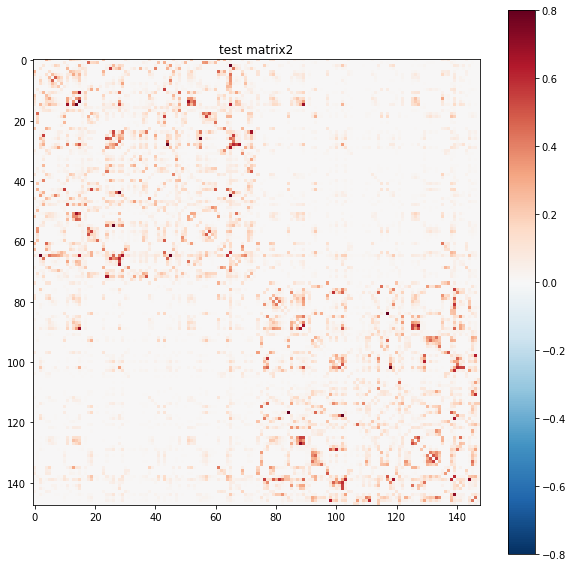

In [14]:
plot_matrix(mate,'test matrix2',0.8)

In [15]:
def get_matrix_list(group_name):
    sub_list=[]
    sub_names=read_files(group_name)
    for sub in sub_names:
        sub_mat=load_matrix(group_name,sub)
        print(sub_mat.shape)
        sub_mats=matrix_1642148(sub_mat)
        print(sub_mats.shape)
        sub_list.append(sub_mats)
    return sub_list

In [16]:
list_sub_0=get_matrix_list(group_names[0])

(164, 164)
origin dim:  (164, 164)
origin dim:  (163, 163)
origin dim:  (162, 162)
origin dim:  (161, 161)
origin dim:  (160, 160)
origin dim:  (159, 159)
origin dim:  (158, 158)
origin dim:  (157, 157)
origin dim:  (156, 156)
origin dim:  (155, 155)
origin dim:  (154, 154)
origin dim:  (153, 153)
origin dim:  (152, 152)
origin dim:  (151, 151)
origin dim:  (150, 150)
origin dim:  (149, 149)
(148, 148)
(164, 164)
origin dim:  (164, 164)
origin dim:  (163, 163)
origin dim:  (162, 162)
origin dim:  (161, 161)
origin dim:  (160, 160)
origin dim:  (159, 159)
origin dim:  (158, 158)
origin dim:  (157, 157)
origin dim:  (156, 156)
origin dim:  (155, 155)
origin dim:  (154, 154)
origin dim:  (153, 153)
origin dim:  (152, 152)
origin dim:  (151, 151)
origin dim:  (150, 150)
origin dim:  (149, 149)
(148, 148)
(164, 164)
origin dim:  (164, 164)
origin dim:  (163, 163)
origin dim:  (162, 162)
origin dim:  (161, 161)
origin dim:  (160, 160)
origin dim:  (159, 159)
origin dim:  (158, 158)
origin di

In [18]:
len(list_sub_0)

15

In [20]:
list_sub_0[7].shape

(148, 148)

In [21]:
list_sub_1=get_matrix_list(group_names[1])

(164, 164)
origin dim:  (164, 164)
origin dim:  (163, 163)
origin dim:  (162, 162)
origin dim:  (161, 161)
origin dim:  (160, 160)
origin dim:  (159, 159)
origin dim:  (158, 158)
origin dim:  (157, 157)
origin dim:  (156, 156)
origin dim:  (155, 155)
origin dim:  (154, 154)
origin dim:  (153, 153)
origin dim:  (152, 152)
origin dim:  (151, 151)
origin dim:  (150, 150)
origin dim:  (149, 149)
(148, 148)
(164, 164)
origin dim:  (164, 164)
origin dim:  (163, 163)
origin dim:  (162, 162)
origin dim:  (161, 161)
origin dim:  (160, 160)
origin dim:  (159, 159)
origin dim:  (158, 158)
origin dim:  (157, 157)
origin dim:  (156, 156)
origin dim:  (155, 155)
origin dim:  (154, 154)
origin dim:  (153, 153)
origin dim:  (152, 152)
origin dim:  (151, 151)
origin dim:  (150, 150)
origin dim:  (149, 149)
(148, 148)
(164, 164)
origin dim:  (164, 164)
origin dim:  (163, 163)
origin dim:  (162, 162)
origin dim:  (161, 161)
origin dim:  (160, 160)
origin dim:  (159, 159)
origin dim:  (158, 158)
origin di

In [22]:
len(list_sub_1)

34

In [23]:
list_sub_2=get_matrix_list(group_names[2])
len(list_sub_2)

(164, 164)
origin dim:  (164, 164)
origin dim:  (163, 163)
origin dim:  (162, 162)
origin dim:  (161, 161)
origin dim:  (160, 160)
origin dim:  (159, 159)
origin dim:  (158, 158)
origin dim:  (157, 157)
origin dim:  (156, 156)
origin dim:  (155, 155)
origin dim:  (154, 154)
origin dim:  (153, 153)
origin dim:  (152, 152)
origin dim:  (151, 151)
origin dim:  (150, 150)
origin dim:  (149, 149)
(148, 148)
(164, 164)
origin dim:  (164, 164)
origin dim:  (163, 163)
origin dim:  (162, 162)
origin dim:  (161, 161)
origin dim:  (160, 160)
origin dim:  (159, 159)
origin dim:  (158, 158)
origin dim:  (157, 157)
origin dim:  (156, 156)
origin dim:  (155, 155)
origin dim:  (154, 154)
origin dim:  (153, 153)
origin dim:  (152, 152)
origin dim:  (151, 151)
origin dim:  (150, 150)
origin dim:  (149, 149)
(148, 148)
(164, 164)
origin dim:  (164, 164)
origin dim:  (163, 163)
origin dim:  (162, 162)
origin dim:  (161, 161)
origin dim:  (160, 160)
origin dim:  (159, 159)
origin dim:  (158, 158)
origin di

16

In [24]:
list_sub_3=get_matrix_list(group_names[3])
len(list_sub_3)

(164, 164)
origin dim:  (164, 164)
origin dim:  (163, 163)
origin dim:  (162, 162)
origin dim:  (161, 161)
origin dim:  (160, 160)
origin dim:  (159, 159)
origin dim:  (158, 158)
origin dim:  (157, 157)
origin dim:  (156, 156)
origin dim:  (155, 155)
origin dim:  (154, 154)
origin dim:  (153, 153)
origin dim:  (152, 152)
origin dim:  (151, 151)
origin dim:  (150, 150)
origin dim:  (149, 149)
(148, 148)
(164, 164)
origin dim:  (164, 164)
origin dim:  (163, 163)
origin dim:  (162, 162)
origin dim:  (161, 161)
origin dim:  (160, 160)
origin dim:  (159, 159)
origin dim:  (158, 158)
origin dim:  (157, 157)
origin dim:  (156, 156)
origin dim:  (155, 155)
origin dim:  (154, 154)
origin dim:  (153, 153)
origin dim:  (152, 152)
origin dim:  (151, 151)
origin dim:  (150, 150)
origin dim:  (149, 149)
(148, 148)
(164, 164)
origin dim:  (164, 164)
origin dim:  (163, 163)
origin dim:  (162, 162)
origin dim:  (161, 161)
origin dim:  (160, 160)
origin dim:  (159, 159)
origin dim:  (158, 158)
origin di

11

In [26]:
def save_data_to_disk(save_path,group,datatype,data):
    save_name='/PD_'+group+'_'+datatype
    data_save_path=save_path+save_name
    np.savez_compressed(data_save_path,a = data,dtype=object)
    return data_save_path

In [27]:
save_data_to_disk(DATA_PATH,group_names[0],datatype_list[1],list_sub_0)

'/home/dell/IDA_data/PD/connectome_DTI/PD_control_matrix'

In [28]:
save_data_to_disk(DATA_PATH,group_names[1],datatype_list[1],list_sub_1)

'/home/dell/IDA_data/PD/connectome_DTI/PD_PD_matrix'

In [29]:
save_data_to_disk(DATA_PATH,group_names[2],datatype_list[1],list_sub_2)

'/home/dell/IDA_data/PD/connectome_DTI/PD_Prodromal_matrix'

In [30]:
save_data_to_disk(DATA_PATH,group_names[3],datatype_list[1],list_sub_3)

'/home/dell/IDA_data/PD/connectome_DTI/PD_SWEDD_matrix'

In [31]:
def load_data_from_disk(load_path,group,datatype):
    load_name='/PD_'+group+'_'+datatype+'.npz'
    data_path=load_path+load_name
    print(f'load data from: {data_path}')
    data = np.load(data_path)['a']
    return data

In [32]:
data_loaded_0=load_data_from_disk(DATA_PATH,group_names[0],datatype_list[1])

load data from: /home/dell/IDA_data/PD/connectome_DTI/PD_control_matrix.npz


In [33]:
data_loaded_0.shape

(15, 148, 148)

In [34]:
data_loaded_1=load_data_from_disk(DATA_PATH,group_names[1],datatype_list[1])
data_loaded_1.shape

load data from: /home/dell/IDA_data/PD/connectome_DTI/PD_PD_matrix.npz


(34, 148, 148)

In [35]:
data_loaded_2=load_data_from_disk(DATA_PATH,group_names[2],datatype_list[1])
data_loaded_2.shape

load data from: /home/dell/IDA_data/PD/connectome_DTI/PD_Prodromal_matrix.npz


(16, 148, 148)

In [36]:
data_loaded_3=load_data_from_disk(DATA_PATH,group_names[3],datatype_list[1])
data_loaded_3.shape

load data from: /home/dell/IDA_data/PD/connectome_DTI/PD_SWEDD_matrix.npz


(11, 148, 148)